# Student Satisfaction and Feedback Analysis Using Survey Data

## Project Overview
This notebook analyzes student feedback using two datasets:
1. Individual-level student feedback on teaching and course attributes
2. Aggregated student satisfaction survey results

The goal is to identify satisfaction trends, influential teaching factors, and areas for improvement using descriptive analytics and data visualization.

## 1. Importing Libraries and Loading Datasets
This section imports the required Python libraries and loads the student feedback and satisfaction survey datasets into pandas DataFrames for analysis.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [3]:
# Load datasets
from google.colab import files
files.upload()
feedback_df = pd.read_csv("student_feedback.csv")

# Quick check
feedback_df.head()

Saving student_feedback.csv to student_feedback (1).csv


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [5]:
# Load datasets
from google.colab import files
files.upload()
survey_df = pd.read_csv("Student_Satisfaction_Survey.csv", encoding='latin1')

# Quick check
survey_df.head()

Saving Student_Satisfaction_Survey.csv to Student_Satisfaction_Survey (1).csv


,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


## 2. Data Cleaning and Preprocessing
Raw survey data often contains inconsistent column names, unnecessary identifiers, and non-numeric values.  
This step standardizes column names, removes irrelevant columns, and converts ratings into numeric format to ensure accurate analysis.


In [15]:
feedback_df.columns = feedback_df.columns.str.strip().str.lower()
survey_df.columns = survey_df.columns.str.strip().str.lower()

print(feedback_df.columns.tolist())
print(survey_df.columns.tolist())

['student_id', 'subject_knowledge', 'concept_clarity', 'presentation_usage', 'assignment_difficulty', 'doubt_solving', 'course_structure', 'extra_support', 'course_recommendation']
['total feedback given', 'total configured', 'questions', 'weightage 1', 'weightage 2', 'weightage 3', 'weightage 4', 'weightage 5', 'average/ percentage', 'course name', 'basic course']


In [16]:
feedback_df = feedback_df.loc[:, ~feedback_df.columns.str.contains("serial")]
survey_df = survey_df.loc[:, ~survey_df.columns.str.contains("serial")]

In [17]:
print(feedback_df.columns.tolist())
print(survey_df.columns.tolist())

['student_id', 'subject_knowledge', 'concept_clarity', 'presentation_usage', 'assignment_difficulty', 'doubt_solving', 'course_structure', 'extra_support', 'course_recommendation']
['total feedback given', 'total configured', 'questions', 'weightage 1', 'weightage 2', 'weightage 3', 'weightage 4', 'weightage 5', 'average/ percentage', 'course name', 'basic course']


## 3. Individual Student Feedback Analysis
This section analyzes individual student responses related to teaching quality, course structure, and support mechanisms.  
The objective is to identify strengths, weaknesses, and factors influencing course recommendation.


In [18]:
feedback_df.rename(columns={
    'student id': 'student_id',
    'well versed with the subject': 'subject_knowledge',
    'explains concepts in an understable way': 'concept_clarity',
    'use of presentations': 'presentation_usage',
    'degree of difficulti in assignmnets': 'assignment_difficulty',
    'solves doubts willingly': 'doubt_solving',
    'structuring of the course': 'course_structure',
    'provides support for students going above and beyond': 'extra_support',
    'course recommendation based on relevance': 'course_recommendation'
}, inplace=True)

feedback_df.head()

,student_id,subject_knowledge,concept_clarity,presentation_usage,assignment_difficulty,doubt_solving,course_structure,extra_support,course_recommendation
0,340,5,2,7,6,9,2,1,8
1,253,6,5,8,6,2,1,2,9
2,680,7,7,6,5,4,2,3,1
3,806,9,6,7,1,5,9,4,6
4,632,8,10,8,4,6,6,9,9


In [19]:
feedback_df.iloc[:, 1:] = feedback_df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   student_id             1001 non-null   int64
 1   subject_knowledge      1001 non-null   int64
 2   concept_clarity        1001 non-null   int64
 3   presentation_usage     1001 non-null   int64
 4   assignment_difficulty  1001 non-null   int64
 5   doubt_solving          1001 non-null   int64
 6   course_structure       1001 non-null   int64
 7   extra_support          1001 non-null   int64
 8   course_recommendation  1001 non-null   int64
dtypes: int64(9)
memory usage: 70.5 KB


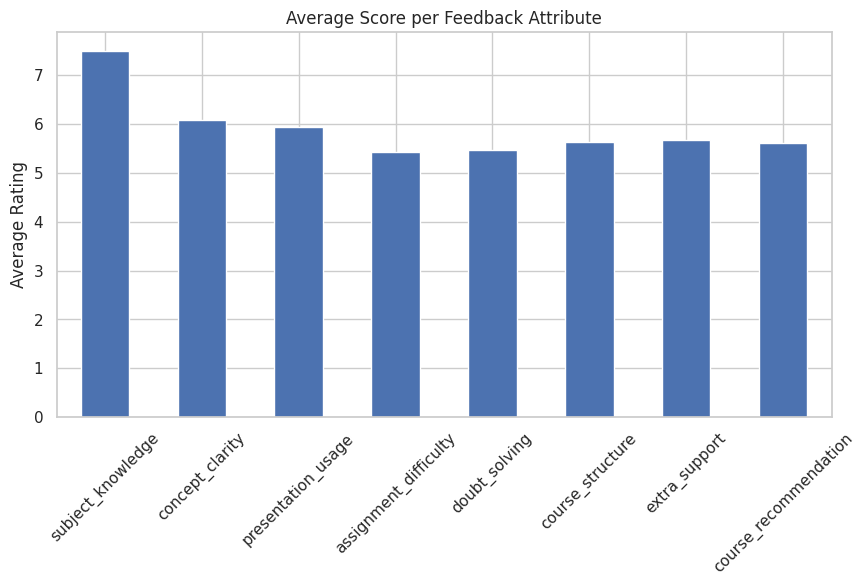

In [20]:
avg_scores = feedback_df.drop(columns=['student_id']).mean()

plt.figure(figsize=(10,5))
avg_scores.plot(kind='bar')
plt.title("Average Score per Feedback Attribute")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

### 3.1 Correlation Analysis
Correlation analysis is used to understand relationships between different feedback attributes and their influence on course recommendation.


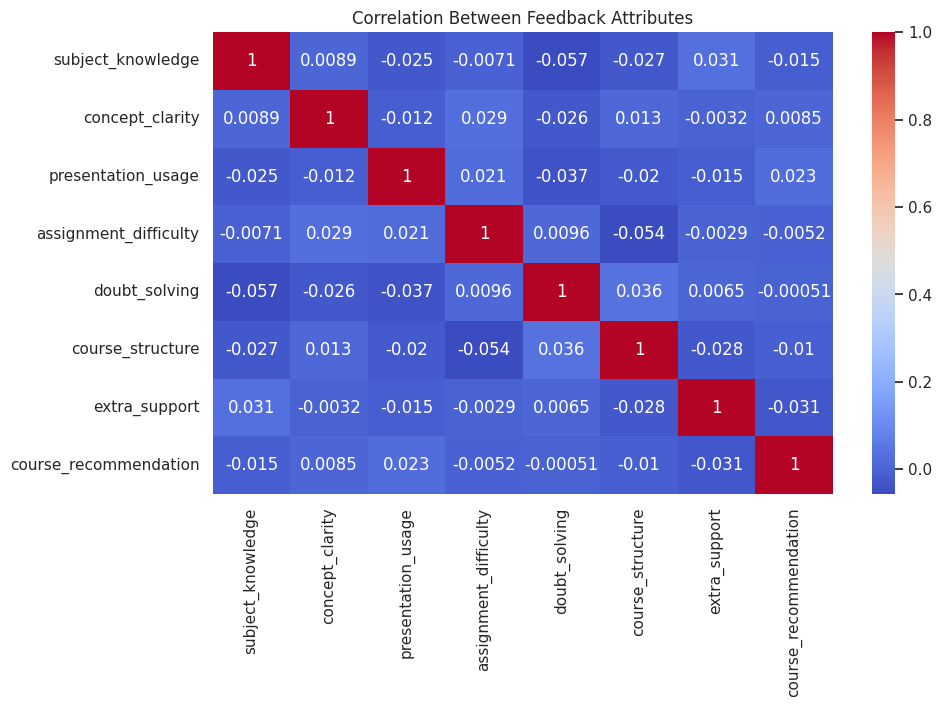

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(feedback_df.drop(columns=['student_id']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Feedback Attributes")
plt.show()

## 4. Aggregated Student Satisfaction Analysis
This section analyzes institution-level survey data that summarizes student satisfaction across different courses and questions.


In [22]:
survey_df.rename(columns={
    'weightage 1': 'w1',
    'weightage 2': 'w2',
    'weightage 3': 'w3',
    'weightage 4': 'w4',
    'weightage 5': 'w5'
}, inplace=True)

survey_df[['w1','w2','w3','w4','w5']] = survey_df[['w1','w2','w3','w4','w5']].apply(pd.to_numeric, errors='coerce')
survey_df.head()

,total feedback given,total configured,questions,w1,w2,w3,w4,w5,average/ percentage,course name,basic course
0,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


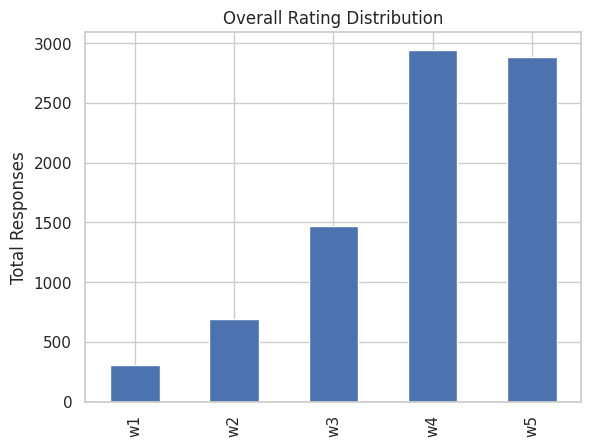

In [23]:
rating_dist = survey_df[['w1','w2','w3','w4','w5']].sum()

rating_dist.plot(kind='bar')
plt.title("Overall Rating Distribution")
plt.ylabel("Total Responses")
plt.show()

### 4.1 Sentiment Distribution
Sentiment is inferred from Likert-scale ratings:
- Ratings 4–5 indicate positive sentiment
- Rating 3 indicates neutral sentiment
- Ratings 1–2 indicate negative sentiment


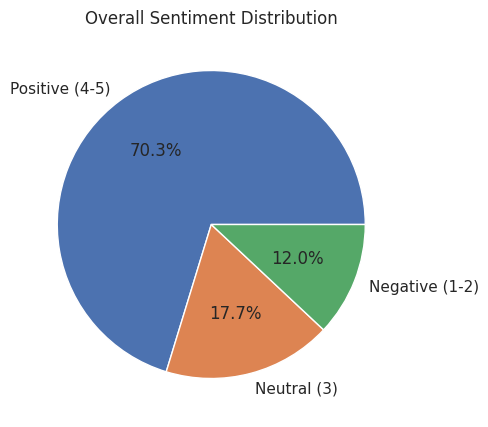

In [24]:
sentiment_counts = {
    'Positive (4-5)': survey_df['w4'].sum() + survey_df['w5'].sum(),
    'Neutral (3)': survey_df['w3'].sum(),
    'Negative (1-2)': survey_df['w1'].sum() + survey_df['w2'].sum()
}

plt.figure(figsize=(5,5))
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%')
plt.title("Overall Sentiment Distribution")
plt.show()

### 4.2 Course-wise Rating Distribution
A stacked bar chart is used to visualize how ratings (1–5) are distributed across courses, helping identify polarization or consistency in student responses.


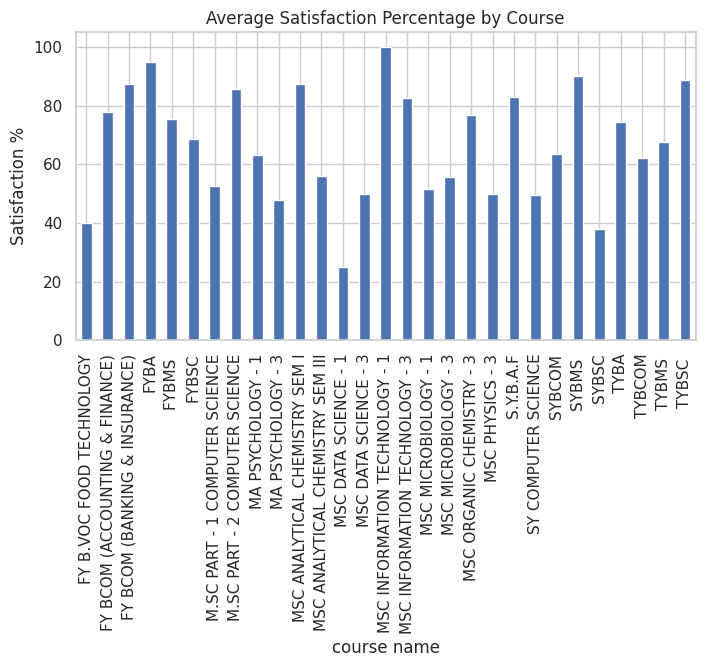

In [25]:
survey_df['total_responses'] = survey_df[['w1','w2','w3','w4','w5']].sum(axis=1)
survey_df['satisfaction_percent'] = ((survey_df['w4'] + survey_df['w5']) / survey_df['total_responses']) * 100

course_sat = survey_df.groupby('course name')['satisfaction_percent'].mean()

course_sat.plot(kind='bar', figsize=(8,4))
plt.title("Average Satisfaction Percentage by Course")
plt.ylabel("Satisfaction %")
plt.show()

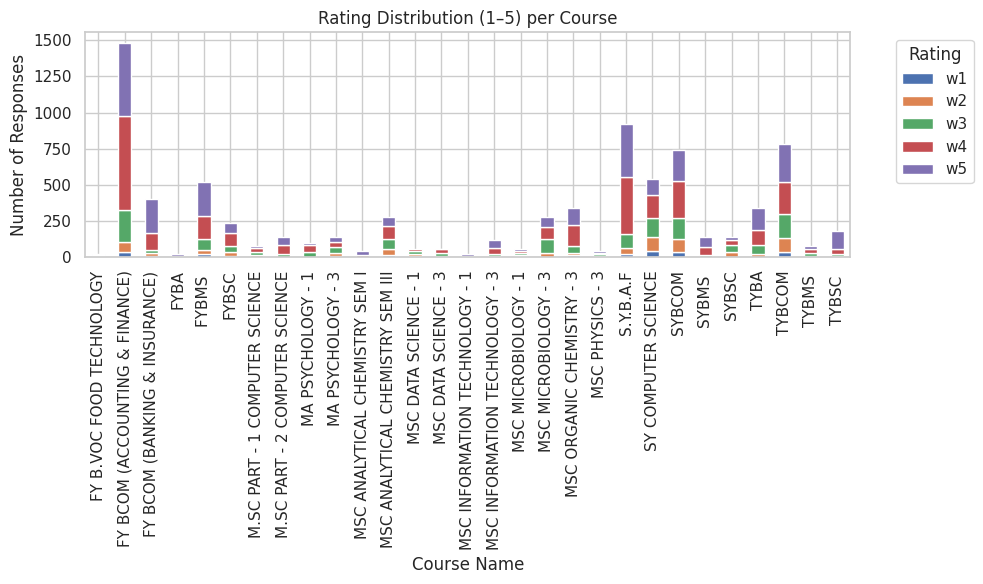

In [26]:
# Stacked bar chart: Rating distribution per course
course_rating_dist = survey_df.groupby('course name')[['w1','w2','w3','w4','w5']].sum()

course_rating_dist.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6)
)

plt.title("Rating Distribution (1–5) per Course")
plt.xlabel("Course Name")
plt.ylabel("Number of Responses")
plt.legend(title="Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 5. Conclusion
This analysis demonstrates how structured student feedback data can be transformed into meaningful insights.  
By combining individual perceptions with aggregated satisfaction trends, institutions can identify key improvement areas and make data-driven academic decisions.
